In [9]:
# Neural network for time series prediction

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

# import neural network libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras import optimizers
from sklearn.model_selection import train_test_split
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))

# Import data
data = yf.download('AMZN', start='2017-01-01', end='2022-12-03')
#data = data.reset_index()


[*********************100%***********************]  1 of 1 completed


In [10]:
# define nn function
def nn_model(X_train, y_train, X_test, y_test, epochs, batch_size, neurons):
    model = Sequential()
    model.add(LSTM(units = neurons, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = neurons, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = neurons, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = neurons))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)
    y_pred = model.predict(X_test)

    # transform data back to original scale
    y_pred = sc.inverse_transform(y_pred)
    return y_pred
    

In [11]:
# drop date
#data = data.drop(['Date'], axis=1)

# use date as index
#data = data.set_index('Date')

# split data
x = data.drop(['Close'], axis=1)
y = data['Close']

train_size = int(len(data) * 0.8)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

#fit y to scalar
y_train = y_train.values.reshape(-1,1)
y_train = sc.fit_transform(y_train)

# reshape data
x_train = np.reshape(x_train.values, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test.values, (x_test.shape[0], x_test.shape[1], 1))



epochs = 25
batch_size = 5
neurons = 100
predicted_stock_price = nn_model(x_train, y_train, x_test, y_test, epochs, batch_size, neurons)



Epoch 1/25
239/239 [==============================] - 12s 13ms/step - loss: 0.0164
Epoch 2/25
239/239 [==============================] - 3s 14ms/step - loss: 0.0041
Epoch 3/25
239/239 [==============================] - 3s 15ms/step - loss: 0.0027
Epoch 4/25
239/239 [==============================] - 3s 13ms/step - loss: 0.0028
Epoch 5/25
239/239 [==============================] - 3s 13ms/step - loss: 0.0024
Epoch 6/25
239/239 [==============================] - 3s 13ms/step - loss: 0.0023
Epoch 7/25
239/239 [==============================] - 3s 14ms/step - loss: 0.0026
Epoch 8/25
239/239 [==============================] - 3s 14ms/step - loss: 0.0019
Epoch 9/25
239/239 [==============================] - 3s 14ms/step - loss: 0.0020
Epoch 10/25
239/239 [==============================] - 4s 16ms/step - loss: 0.0017
Epoch 11/25
239/239 [==============================] - 3s 14ms/step - loss: 0.0017
Epoch 12/25
239/239 [==============================] - 3s 13ms/step - loss: 0.0022
Epoch 13/25


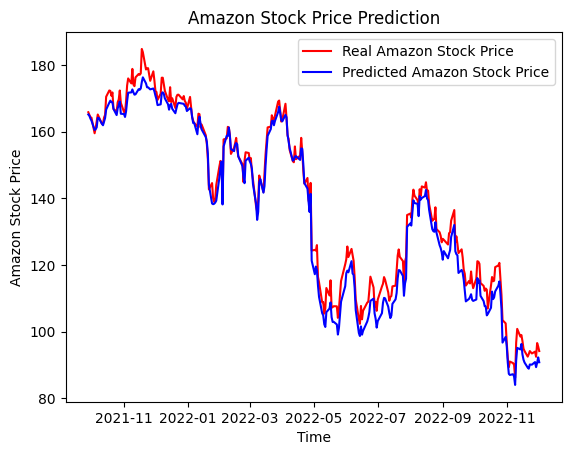

In [13]:
# drop date from y_test
#y_test = y_test.drop(['Date'], axis=1)
# set index of predicted_stock_price to y_test
# scale predicted_stock_price

predicted_stock_price = pd.DataFrame(predicted_stock_price, index=y_test.index, columns=['Close'])
plt.plot(y_test, color = 'red', label = 'Real Amazon Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()